# Pre-treating data for analysis

In [61]:
#imports
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns

In [20]:
#data imports 
tiktok = pd.read_excel('TikTok-comments_12-11-2024_13h26.xlsx')
tiktok.head()

,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,User Replied To,Number of Replies,post_url,shown_comments,scraped_comments,difference
0,111,zxnn,zxnn.ka,https://www.tiktok.com/@zxnn.ka,i got a kamala hq vid right after this,2024-07-24 00:00:00,72K,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,No,---,0,https://www.tiktok.com/@athanchekas/video/7394...,3160,2044,1116
1,104,ade,.ade.orr,https://www.tiktok.com/@.ade.orr,kamala harris for president (im European),2024-09-05 00:00:00,65.8K,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,No,---,0,https://www.tiktok.com/@reals.nas/video/740484...,2816,1161,1655
2,7,Nurasil,nendis02,https://www.tiktok.com/@nendis02,"""K?"" LOVE HER😭🙏",2024-07-26 00:00:00,65.8K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@schfrsgf/video/7395642...,4459,2313,2146
3,3,Hazel ❤️,readsbygeissey,https://www.tiktok.com/@readsbygeissey,The “how may I serve you” is serving 😭💚,2024-07-25 00:00:00,64.7K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@athanchekas/video/7394...,3160,2044,1116
4,9,ktieieieie,ktieieieie,https://www.tiktok.com/@ktieieieie,the gentle parenting purrrrr,2024-07-26 00:00:00,40.7K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@schfrsgf/video/7395642...,4459,2313,2146


In [21]:
# 10 K to 10 000 
tiktok['Likes'] = tiktok['Likes'].fillna('0')

tiktok['Likes'] = np.where(tiktok['Likes'].notna() & tiktok['Likes'].str.endswith('K'),
                         (tiktok['Likes'].str[:-1].astype(float) * 1000),
                        tiktok['Likes'])

tiktok['Likes'] = tiktok['Likes'].astype(float)
tiktok['Likes'] = tiktok['Likes'].fillna(0).astype(int)

In [ ]:
#deleting comments where users only identify each other (starting with @, ending with a space)
tiktok['Comment Text'] = tiktok['Comment Text'].fillna('').astype(str)

tiktok = tiktok[~tiktok['Comment Text'].str.match(r'^@\w+\s*$')]
tiktok.head()


,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,User Replied To,Number of Replies,post_url,shown_comments,scraped_comments,difference
0,111,zxnn,zxnn.ka,https://www.tiktok.com/@zxnn.ka,i got a kamala hq vid right after this,2024-07-24 00:00:00,72000,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,No,---,0,https://www.tiktok.com/@athanchekas/video/7394...,3160,2044,1116
1,104,ade,.ade.orr,https://www.tiktok.com/@.ade.orr,kamala harris for president (im European),2024-09-05 00:00:00,65800,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,No,---,0,https://www.tiktok.com/@reals.nas/video/740484...,2816,1161,1655
2,7,Nurasil,nendis02,https://www.tiktok.com/@nendis02,"""K?"" LOVE HER😭🙏",2024-07-26 00:00:00,65800,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@schfrsgf/video/7395642...,4459,2313,2146
3,3,Hazel ❤️,readsbygeissey,https://www.tiktok.com/@readsbygeissey,The “how may I serve you” is serving 😭💚,2024-07-25 00:00:00,64700,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@athanchekas/video/7394...,3160,2044,1116
4,9,ktieieieie,ktieieieie,https://www.tiktok.com/@ktieieieie,the gentle parenting purrrrr,2024-07-26 00:00:00,40700,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@schfrsgf/video/7395642...,4459,2313,2146


In [ ]:
# ratio shown comments vs scraped comments

tiktok['ratio_scraped_shown'] = tiktok['scraped_comments']/tiktok['shown_comments']
tiktok['ratio_scraped_shown'].mean()
#mean value of scraped comments out of shown comments on tiktok counter - 56,93% 
tiktok['ratio_scraped_shown'].var()

#variance is 0.0155 

0.015499602588963554

In [ ]:
# users - groupby users to see wheher they comment several videos Count the nb of comments ?
count_user =  tiktok.groupby('User @').size().reset_index()
count_user.rename( columns={0 :'count'}, inplace=True )
count_user["count"] = count_user["count"].astype(int)

count_user = count_user.sort_values(by = "count", ascending=False)
count_user[count_user["count"]>=2]

# we have  2711 users that commented posts several times
#need to check if some of them commented on the same post or on differnet posts. 



,User @,count
3927,em_august,16
10861,schfrsgf,14
5240,homoemo,10
10748,sanlee120,9
1176,annaleegarretto,8
...,...,...
12883,user6003427427794,2
2114,brickbybrick03,2
12064,the_glam_pirate,2
13781,zendayasstan_01,2


In [ ]:
#accounting for posts : 

count_post_user =  tiktok.groupby(["post_url",'User @']).size().reset_index()
count_post_user
count_post_user.rename( columns={0 :'count'}, inplace=True )
count_post_user["count"] = count_user["count"].astype(int)

count_post_user = count_post_user.sort_values(by = "count", ascending=False)
count_post_user

#no interaction noticed between different posts. So maybe network would not b einteresting in our case (could be due to the loss of data while scrpaing)

,post_url,User @,count
3927,https://www.tiktok.com/@fallontonight/video/73...,girlmominbama,16.0
10861,https://www.tiktok.com/@schfrsgf/video/7395642...,maisha7t,14.0
5240,https://www.tiktok.com/@kamalahq/photo/7394295...,coolwhip26,10.0
10748,https://www.tiktok.com/@schfrsgf/video/7395642...,lawyermahoraga1,9.0
1176,https://www.tiktok.com/@athanchekas/video/7394...,cringecrange,8.0
...,...,...,...
14324,https://www.tiktok.com/@thekerrywashington/vid...,zulymarp,NaN
14325,https://www.tiktok.com/@thekerrywashington/vid...,zyyoncee,NaN
14326,https://www.tiktok.com/@thekerrywashington/vid...,zyzysarchive,NaN
14327,https://www.tiktok.com/@thekerrywashington/vid...,zz.nevaeh.zz,NaN


Counting the number of users per video - while avoiding duplicates. 

<AxesSubplot:xlabel='post_nb', ylabel='interaction_count'>

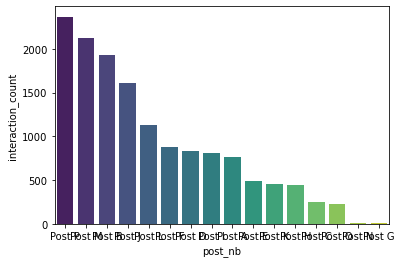

In [ ]:
count_post_user.dropna()
users_per_post = count_post_user.groupby('post_url').size().reset_index()
users_per_post.rename( columns={0 :'interaction_count'}, inplace=True )

#renaming post_urls by Post A, B, C..
videos_list = users_per_post['post_url'].value_counts().index
renaming_posts = {}
for i,video in enumerate(list(videos_list)):
    renaming_posts[video] = "Post " + chr(ord('A')+i)
users_per_post['post_nb'] = users_per_post['post_url'].replace(renaming_posts)

users_per_post = users_per_post.sort_values(by='interaction_count', ascending=False)



#barplotting 
sns.barplot(x='post_nb', y='interaction_count', data=users_per_post, palette='viridis')


<AxesSubplot:xlabel='post_nb', ylabel='share_of_users'>

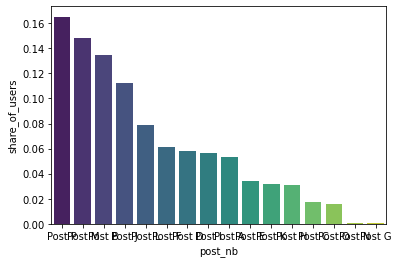

In [71]:

users_per_post['share_of_users'] = users_per_post['interaction_count']/sum(users_per_post['interaction_count'])
users_per_post
sns.barplot(x='post_nb', y='share_of_users', data=users_per_post, palette='viridis')



In [ ]:
#number of likes en moyenne par commentaire sur un post en particulier 



In [ ]:
# NB OF USERS 
# COMMENT LENGTH 
# NB DE LIKES EN MOYENNE PAR POST PAR COM 
# PROPORTION DE REPS AU COMMENTAIRE 
# PROPORTION DES COMS AVEC DES EMOJIS 
# COMS SEULEMENT AVEC EMOJIS / EMOJIS ET IDENTIFICATIONS 
# FAIRE DES BINS AVEC NB DE LIKES ? 

In [ ]:
# barplot - users vs nb of likes 



# TF-IDF